In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

#sciPy

SciPy — библиотека для языка программирования Python с открытым исходным кодом, предназначенная для выполнения научных и инженерных расчётов.

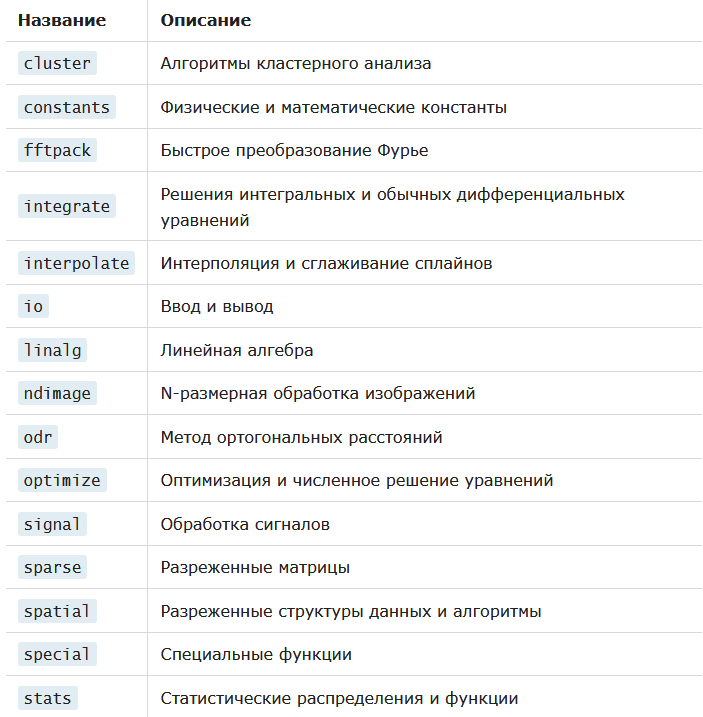

##План

1. scipy.constants

2. scipy.io

3. scipy.optimize

4. scipy.integrate

5. scipy.linalg

##scipy.constants

Модуль содержащий математические и физические константы. [Здесь](https://docs.scipy.org/doc/scipy/reference/constants.html) представлен весь список имеющихся констант.

In [ ]:
from scipy import constants
pi = constants.pi
print(f"SciPy pi value = {pi}")

SciPy pi value = 3.141592653589793


Поиск констант по названию.

In [ ]:
constants.find('Avogadro')

['Avogadro constant']

In [ ]:
constants.physical_constants['Avogadro constant']

(6.02214076e+23, 'mol^-1', 0.0)

##scipy.io

Модуль позволяющий сохранять массивы данных. 

In [ ]:
from scipy import io
a = np.ones((3, 3))
b = np.zeros((3, 3))

io.savemat('test.txt', {'a' : a, 'b' : b})

matrix = io.loadmat('test.txt')
print(matrix['a'], matrix['b'])

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


##scipy.optimize

SciPy optimize предоставляет функции для минимизации (или максимизации) объективных функций, возможно, с учетом ограничений. Он включает решатели для нелинейных задач (с поддержкой алгоритмов локальной и глобальной оптимизации), линейное программирование, ограниченные и нелинейные наименьшие квадраты, поиск корней и подгонку кривых.

###Поиск экстемумов

In [ ]:
from scipy import optimize

In [ ]:
def f(x):
    return x**2 + 10*np.sin(x)

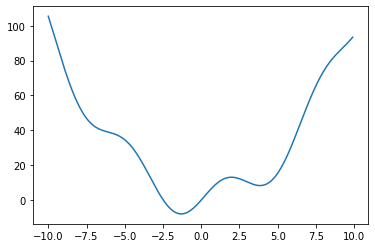

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

In [ ]:
optimize.minimize(f, x0=0)

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [ ]:
optimize.minimize(f, x0=0, method="L-BFGS-B")

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.59872117e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644015])

In [ ]:
optimize.minimize(f, x0=3, method="L-BFGS-B")

      fun: array([8.31558558])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.77635685e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([3.83746709])

In [ ]:
optimize.basinhopping(f, 0)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08583781]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1026
                        nit: 100
                       njev: 513
                          x: array([-1.30644001])

In [ ]:
optimize.minimize(f, x0=1, bounds=((0, 10), ))

      fun: array([0.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([10.00000001])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.])

###Поиск корней уравнения

Поиск корней уравнения f(x) = 0.

In [ ]:
optimize.root(f, x0=1)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

In [ ]:
optimize.root(f, x0=-2.5)

    fjac: array([[-1.]])
     fun: array([-1.77635684e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-4.42498482e-10])
       r: array([12.84593])
  status: 1
 success: True
       x: array([-2.47948183])

##scipy.integrate

Подпакет scipy.integrate предоставляет несколько методов интегрирования, включая интегратор обыкновенных дифференциальных уравнений.

In [ ]:
from scipy import integrate

In [ ]:
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on i

###Интегрирование

In [ ]:
res, err = integrate.quad(np.sin, 0, pi/2)
print(res, err)

0.9999999999999999 1.1102230246251564e-14


In [ ]:
f = lambda x, y : 2*x*y  
g = lambda x : 0
h = lambda y : 4*y**2
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)  
print(i)

(0.04166666666666667, 5.491107323698757e-15)


###Дифференциальные уравнения

In [ ]:
def calc_derivative(ypos, time):
    return -2 * ypos

In [ ]:
time_vec = np.linspace(0, 4, 40)
y = integrate.odeint(calc_derivative, y0=1, t=time_vec)
y

array([[1.00000000e+00],
       [8.14542898e-01],
       [6.63480126e-01],
       [5.40433015e-01],
       [4.40205868e-01],
       [3.58566566e-01],
       [2.92067826e-01],
       [2.37901766e-01],
       [1.93781189e-01],
       [1.57843082e-01],
       [1.28569955e-01],
       [1.04725738e-01],
       [8.53036015e-02],
       [6.94834394e-02],
       [5.65972376e-02],
       [4.61008805e-02],
       [3.75511484e-02],
       [3.05870204e-02],
       [2.49144403e-02],
       [2.02938795e-02],
       [1.65302356e-02],
       [1.34645860e-02],
       [1.09674830e-02],
       [8.93348546e-03],
       [7.27670714e-03],
       [5.92719016e-03],
       [4.82795066e-03],
       [3.93257294e-03],
       [3.20324937e-03],
       [2.60918427e-03],
       [2.12529267e-03],
       [1.73114166e-03],
       [1.41008843e-03],
       [1.14857711e-03],
       [9.35565007e-04],
       [7.62057552e-04],
       [6.20728409e-04],
       [5.05609460e-04],
       [4.11840447e-04],
       [3.35461687e-04]])

##scipy.linalg

Модуль поддерживающий работу с линейной алгебры.

In [ ]:
from scipy import linalg

###Работа с системами линейных уранений

Решим систему вида:


> x + 2y - 3z = -3

> 2x -5y + 4z = 13

> 5x + 4y -z = 5











In [ ]:
a = np.array([[1, 2, -3], [2, -5, 4], [5, 4, -1]])  
b = np.array([[-3], [13], [5]])  
x = linalg.solve(a, b)  
print(x)  
print("Проверка решения")  
print(a.dot(x) - b)  

[[ 2.]
 [-1.]
 [ 1.]]
Проверка решения
[[0.]
 [0.]
 [0.]]


###Нахождение определителя матрицы

In [ ]:
A = np.array([[1,2,9],[3,4,8],[7,8,4]])
x = linalg.det(A)
print('Determinant of \n{} \n is {}'.format(A,x))

Determinant of 
[[1 2 9]
 [3 4 8]
 [7 8 4]] 
 is 3.999999999999986


###Нахождение собственных чисел и векторов

In [ ]:
A = np.array([[2,1,-2],[1,0,0],[0,1,0]])
values, vectors = linalg.eig(A)
print(values)
print(vectors)

[-1.+0.j  2.+0.j  1.+0.j]
[[-0.57735027 -0.87287156  0.57735027]
 [ 0.57735027 -0.43643578  0.57735027]
 [-0.57735027 -0.21821789  0.57735027]]


#SymPy

SymPy - это библиотека Python для символьной математики. Она стремится стать полнофункциональной системой компьютерной алгебры (CAS), сохраняя при этом максимально простой код, чтобы быть понятной и легко расширяемой. SymPy написан полностью на языке Python. 

In [ ]:
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sympy

### Использование символов

In [ ]:
x_t + 1

NameError: ignored

In [ ]:
x = sympy.symbols('x')
x+1

x + 1

In [ ]:
expr = x + 1
expr

x + 1

In [ ]:
x = 2
expr

x + 1

In [ ]:
x = sympy.symbols('x')
expr = x + 1
expr.subs(x, 2) # замена символа на число или другой символ

3

### Уравнения

In [ ]:
sympy.Eq(x + 1, 4)

Eq(x + 1, 4)

In [ ]:
a = (x+1)**2
b = x**2 + 2*x + 1
sympy.simplify(a - b) # упрощение выражения

0

In [ ]:
c = x**2 - 2*x + 1
sympy.simplify(a - c)

4*x

In [ ]:
a = sympy.cos(x)**2 - sympy.sin(x)**2
b = sympy.cos(2*x)
a.equals(b) # сравнение двух выражений

True

### Substitution

In [ ]:
x, y, z = sympy.symbols('x y z')

In [ ]:
expr = sympy.cos(x) + 1
expr.subs(x, y) # замена символа на символ, возвращает новое выражение

cos(y) + 1

In [ ]:
expr.subs(x, 0) # замена символа на число

2

In [ ]:
expr = x**y
expr

x**y

In [ ]:
expr = expr.subs(y, x**y) # замена символа на выражение
expr

x**(x**y)

In [ ]:
expr = expr.subs(y, x**x)
expr

x**(x**(x**x))

In [ ]:
expr = sympy.sin(2*x) + sympy.cos(2 * x)
sympy.expand_trig(expr) # "разворачивает" выражение, возвращает новое

2*sin(x)*cos(x) + 2*cos(x)**2 - 1

In [ ]:
expr = x**3 + 4*x*y -z
expr.subs([(x, 2), (y, 4), (z, 0)]) # заменяет все указанные переменные в выражении

40

### Преобразование строки в выражение

In [ ]:
sym_expr = 'x**2 + 3*x - 1/2'
expr = sympy.sympify(sym_expr) # преобразует строку в выражение
expr

x**2 + 3*x - 1/2

In [ ]:
expr.subs(x, 2)

19/2

### evalf

In [ ]:
expr = sympy.cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

In [ ]:
one = sympy.cos(1)**2 + sympy.sin(1)**2
(one -1).evalf() # ошибка округления

-0.e-124

In [ ]:
(one - 1).evalf(chop=True) # удаление бесконечно малых

0

### Упрощение, факторизация

#### expand()

In [ ]:
sympy.expand((x+1)**2) # представляет произведение в виде суммы слагаемых

x**2 + 2*x + 1

In [ ]:
sympy.expand((x+2)*(x-3))

x**2 - x - 6

In [ ]:
sympy.expand((x+1)*(x-2) - (x-1)*x)

-2

#### factor()

In [ ]:
sympy.factor(x**3 - x**2 + x -1) # "сворачивает" выражение

(x - 1)*(x**2 + 1)

In [ ]:
sympy.factor(x**2*z + 4*x*y*z + 4*y**2*z)

z*(x + 2*y)**2

In [ ]:
sympy.factor_list(x**2*z + 4*x*y*z + 4*y**2*z) # возвращает список множителей

(1, [(z, 1), (x + 2*y, 2)])

In [ ]:
sympy.expand((sympy.cos(x) + sympy.sin(x))**2)

sin(x)**2 + 2*sin(x)*cos(x) + cos(x)**2

In [ ]:
sympy.factor(sympy.sin(x)**2 + 2*sympy.sin(x)*sympy.cos(x) + sympy.cos(x)**2)

(sin(x) + cos(x))**2

In [ ]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

x**3 - x**2*z + 2*x**2 + x*y + x - 3

In [ ]:
collected_expr = sympy.collect(expr, x) # выражение относительно степеней x
collected_expr

x**3 + x**2*(2 - z) + x*(y + 1) - 3

In [ ]:
collected_expr.coeff(x, 2) # коэффициент при x^2

2 - z

#### cancel()

In [ ]:
sympy.cancel((x**2 + 2*x + 1)/(x**2 + x)) # упрощает дробь

(x + 1)/x

In [ ]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

(3*x/2 - 2)/(x - 4) + 1/x

In [ ]:
sympy.cancel(expr) # приводит дроби к общему знаменателю

(3*x**2 - 2*x - 8)/(2*x**2 - 8*x)

In [ ]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 -1)
expr

(x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)

In [ ]:
sympy.cancel(expr)

(y**2 - 2*y*z + z**2)/(x - 1)

In [ ]:
sympy.factor(expr)

(y - z)**2/(x - 1)

#### apart()

In [ ]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

(4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

In [ ]:
sympy.apart(expr) # разбиени дроби на сумму дробей

(2*x - 1)/(x**2 + x + 1) - 1/(x + 4) + 3/x

#### powsimp()

In [ ]:
x, y = sympy.symbols('x y', positive=True)
a, b = sympy.symbols('a b', real=True)
z, t, c = sympy.symbols('z t c')

In [ ]:
sympy.powsimp(x**a*x**b)

x**(a + b)

In [ ]:
sympy.powsimp(x**a*y**a)

(x*y)**a

In [ ]:
sympy.powsimp(t**c*z**c)

t**c*z**c

In [ ]:
sympy.powsimp(t**c*z**c, force=True)

(t*z)**c

### Интегрирование

In [ ]:
sympy.integrate(sympy.cos(x), x) # взятие неопределённого интеграла

sin(x)

In [ ]:
sympy.integrate(sympy.exp(-x), (x, 0, sympy.oo)) # взятие определённого интеграла

1

In [ ]:
sympy.integrate(sympy.exp(-x**2 - y**2), (x, -sympy.oo, sympy.oo), (y, -sympy.oo, sympy.oo)) # интегрирование по двум переменным

pi

In [ ]:
expr = sympy.integrate(x**x, x)
print(expr)

Integral(x**x, x)


In [ ]:
expr # неопределённый интеграл

Integral(x**x, x)

In [ ]:
expr = sympy.Integral(sympy.log(x)**2, x)
expr

Integral(log(x)**2, x)

In [ ]:
expr.doit()

x*log(x)**2 - 2*x*log(x) + 2*x

### Пределы

In [ ]:
sympy.limit(sympy.sin(x)/x, x, 0) # вычисление предела

1

In [ ]:
expr = x**2/sympy.exp(x)
expr.subs(x, sympy.oo)

nan

In [ ]:
sympy.limit(expr, x, sympy.oo)

0

In [ ]:
expr = sympy.Limit((sympy.cos(x) - 1)/x, x, 0)
expr

Limit((cos(x) - 1)/x, x, 0)

In [ ]:
expr.doit()

0

In [ ]:
sympy.limit(1/x, x, 0, '+') # x -> +0

oo

In [ ]:
sympy.limit(1/x, x, 0, '-') # x -> -0

-oo

### Решение алгебраических уравнений

In [ ]:
sympy.solveset(x**2 -x, x) # решение алгебраического уравнения

FiniteSet(0, 1)

In [ ]:
sympy.solveset(sympy.sin(x) -1, x, domain=sympy.S.Reals) # только действиетльные решения

ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers)

In [ ]:
sympy.linsolve([x + y + z -1, x + y + 2*z -3], (x, y, z)) # решение СЛАУ, список уравнений

FiniteSet((-y - 1, y, 2))

In [ ]:
sympy.linsolve(sympy.Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z)) # решение СЛАУ, матрица системы

FiniteSet((-y - 1, y, 2))

In [ ]:
M = sympy.Matrix(((1, 1, 1, 1), (1, 1, 2, 3))) # решение СЛАУ, A*x = b
system = A, b = M[:, :-1], M[:, -1]
sympy.linsolve(system, x, y, z)

FiniteSet((-y - 1, y, 2))

In [ ]:
sympy.nonlinsolve([x*y -1, x -2], x, y) # решение системы нелинейных алгебраических уравнений

FiniteSet((2, 1/2))

In [ ]:
sympy.nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

FiniteSet((I, I), (-I, I), (I, -I), (-I, -I))

In [ ]:
sympy.nonlinsolve([x**2 - 2*y**2 - 2, x*y - 2], [x, y])

FiniteSet((-2, -1), (2, 1), (-sqrt(2)*I, sqrt(2)*I), (sqrt(2)*I, -sqrt(2)*I))

In [ ]:
sympy.nonlinsolve([x*y, x*y - x], [x, y])

FiniteSet((0, y))

### Матричные операции

In [ ]:
sympy.Matrix([[1, -1], [3, 4], [0, 2]]) # матрица

Matrix([
[1, -1],
[3,  4],
[0,  2]])

In [ ]:
sympy.Matrix([1, 2, 3]) # столбец

Matrix([
[1],
[2],
[3]])

In [ ]:
M = sympy.Matrix([[1, 2, 3], [3, 2, 1]])
N = sympy.Matrix([0, 1, 1])
M * N # перемножение матриц

Matrix([
[5],
[3]])

In [ ]:
M = sympy.Matrix([[1, 2, 3], [-2, 0, 4]])
M

Matrix([
[ 1, 2, 3],
[-2, 0, 4]])

In [ ]:
M.shape # размерность матрицы

(2, 3)

In [ ]:
M.row(0) # получение строки матрицы

Matrix([[1, 2, 3]])

In [ ]:
M.col(-1) # получение столбца матрицы

Matrix([
[3],
[4]])

In [ ]:
M.col_del(0) # удаление стобца
M

Matrix([
[2, 3],
[0, 4]])

In [ ]:
M.row_del(1) # удаление строки
M

Matrix([[2, 3]])

In [ ]:
M = M.row_insert(1, sympy.Matrix([[0, 4]])) # вставка строки
M

Matrix([
[2, 3],
[0, 4]])

In [ ]:
M = M.col_insert(0, sympy.Matrix([1, -2])) # вставка столбца
M

Matrix([
[ 1, 2, 3],
[-2, 0, 4]])

In [ ]:
M = sympy.Matrix([[1, 3], [-2, 3]])
N = sympy.Matrix([[0, 3], [0, 7]])
M + N # sum

Matrix([
[ 1,  6],
[-2, 10]])

In [ ]:
M * N # mul

Matrix([
[0, 24],
[0, 15]])

In [ ]:
3 * M

Matrix([
[ 3, 9],
[-6, 9]])

In [ ]:
M**2 # pow

Matrix([
[-5, 12],
[-8,  3]])

In [ ]:
M**-1 # inverse

Matrix([
[1/3, -1/3],
[2/9,  1/9]])

In [ ]:
M = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
M.T # transpose

Matrix([
[1, 4],
[2, 5],
[3, 6]])

In [ ]:
sympy.eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [ ]:
sympy.eye(4)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [ ]:
sympy.zeros(2, 3)

Matrix([
[0, 0, 0],
[0, 0, 0]])

In [ ]:
sympy.ones(3, 2) 

Matrix([
[1, 1],
[1, 1],
[1, 1]])

In [ ]:
sympy.diag(1, 2, 3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [ ]:
sympy.diag(-1, sympy.ones(2, 2), sympy.Matrix([5, 7, 5]))

Matrix([
[-1, 0, 0, 0],
[ 0, 1, 1, 0],
[ 0, 1, 1, 0],
[ 0, 0, 0, 5],
[ 0, 0, 0, 7],
[ 0, 0, 0, 5]])

In [ ]:
M = sympy.Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

Matrix([
[1,  0, 1],
[2, -1, 3],
[4,  3, 2]])

In [ ]:
M.det() # determinant

-1

In [ ]:
M = sympy.Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, 4]])
M

Matrix([
[ 1,  0,  1, 3],
[ 2,  3,  4, 7],
[-1, -3, -3, 4]])

In [ ]:
M.rref() # reduced row echelon form

(Matrix([
 [1, 0,   1, 0],
 [0, 1, 2/3, 0],
 [0, 0,   0, 1]]), (0, 1, 3))

In [ ]:
M = sympy.Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M

Matrix([
[1,  2, 3, 0, 0],
[4, 10, 0, 0, 1]])

In [ ]:
M = sympy.Matrix([[1, 1, 2], [2, 1, 3], [3, 1, 4]])
M

Matrix([
[1, 1, 2],
[2, 1, 3],
[3, 1, 4]])

In [ ]:
M = sympy.Matrix([[3, -2, 4, -2], [5, 3, -3, -2], [5, -2, 2, -2], [5, -2, -3, 3]])
M

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [ ]:
M.eigenvals() # собственные значения

{3: 1, -2: 1, 5: 2}

In [ ]:
M.eigenvects() # собственные вектора

[(-2, 1, [Matrix([
   [0],
   [1],
   [1],
   [1]])]), (3, 1, [Matrix([
   [1],
   [1],
   [1],
   [1]])]), (5, 2, [Matrix([
   [1],
   [1],
   [1],
   [0]]), Matrix([
   [ 0],
   [-1],
   [ 0],
   [ 1]])])]

In [ ]:
P, D = M.diagonalize() # диагонализация
P

Matrix([
[0, 1, 1,  0],
[1, 1, 1, -1],
[1, 1, 1,  0],
[1, 1, 0,  1]])

In [ ]:
D # диагональная

Matrix([
[-2, 0, 0, 0],
[ 0, 3, 0, 0],
[ 0, 0, 5, 0],
[ 0, 0, 0, 5]])

In [ ]:
P*D*P**-1

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [ ]:
P*D*P**-1 == M

True

### Графики

In [ ]:
from sympy.plotting import plot
x = sympy.symbols('x')

In [ ]:
p1 = plot(x*x, show=False)
p2 = plot(x, show=False)
p1.append(p2[0]) # добавляет один элемент из списка
print(p1)

Plot object containing:
[0]: cartesian line: x**2 for x over (-10.0, 10.0)
[1]: cartesian line: x for x over (-10.0, 10.0)


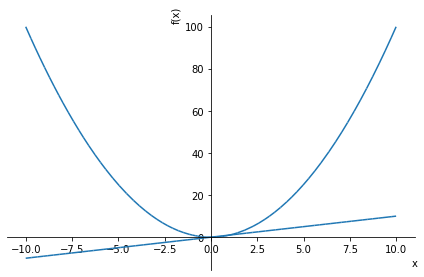

In [ ]:
p1.show()

In [ ]:
p1 = plot(x*x, show=False)
p2 = plot(x, -x, show=False)
p1.extend(p2) # добавляет весь список
print(p1)

Plot object containing:
[0]: cartesian line: x**2 for x over (-10.0, 10.0)
[1]: cartesian line: x for x over (-10.0, 10.0)
[2]: cartesian line: -x for x over (-10.0, 10.0)


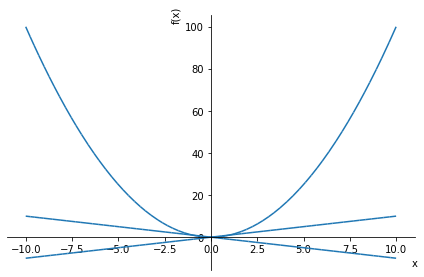

In [ ]:
p1.show()

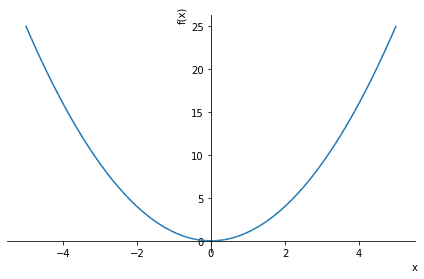

In [ ]:
plot(x**2, (x, -5, 5)) # single plot

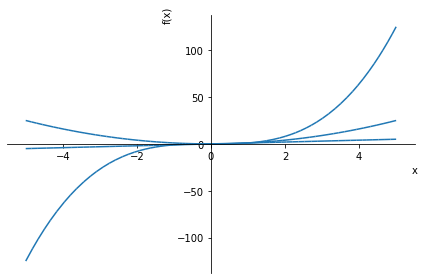

In [ ]:
plot(x, x**2, x**3, (x, -5, 5)) # multiple plots, single range

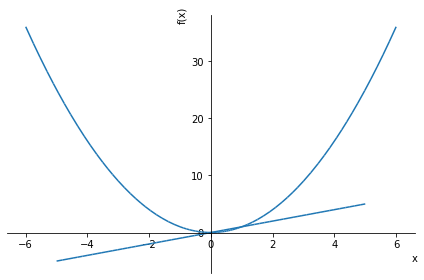

In [ ]:
plot((x**2, (x, -6, 6)), (x, (x, -5, 5))) # multiple plots, different ranges

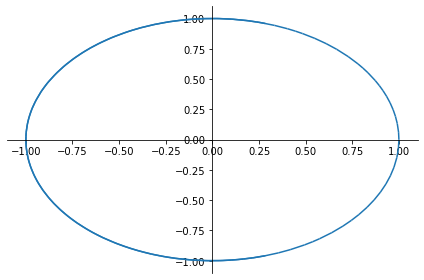

In [ ]:
from sympy.plotting import plot_parametric
u = sympy.symbols('u')
plot_parametric(sympy.cos(u), sympy.sin(u), (u, -5, 5)) # parametric plot

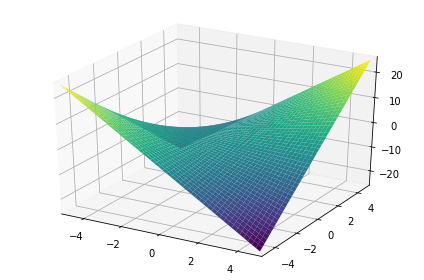

In [ ]:
from sympy.plotting import plot3d
x, y = sympy.symbols('x y')
plot3d(x*y, (x, -5, 5), (y, -5, 5))

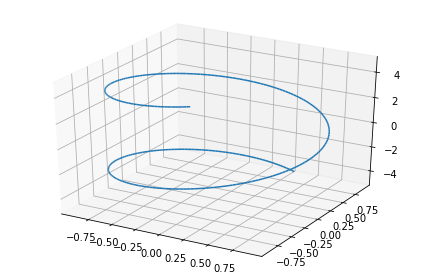

In [ ]:
from sympy.plotting import plot3d_parametric_line
u = sympy.symbols('u')
plot3d_parametric_line(sympy.cos(u), sympy.sin(u), u, (u, -5, 5)) # 3d parametric line

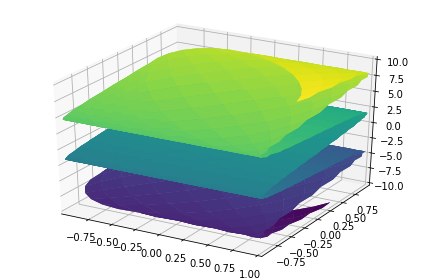

In [ ]:
from sympy.plotting import plot3d_parametric_surface
u, v = sympy.symbols('u v')
plot3d_parametric_surface(sympy.cos(u + v), sympy.sin(u - v), u - v, (u, -5, 5), (v, -5, 5)) # 3d parametric surface

In [ ]:
import numpy as np

In [ ]:
set("DFCDSFDSNBYJFGDSFSFSRYHFDGESBHRDHH")

{'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'N', 'R', 'S', 'Y'}

#Полезные материалы

1. [Все константы sciPy](https://docs.scipy.org/doc/scipy/reference/constants.html)
2. [Описания методов поиска экстремумов](https://habr.com/ru/post/439288/) 
3. [Материал по sciPy](https://scipy-lectures.org/)
4. [Материал по SymPy](https://docs.sympy.org/dev/tutorials/intro-tutorial/index.html)
5. [Построение графиков в SymPy](https://docs.sympy.org/dev/modules/plotting.html)